In [1]:
pip install transformers datasets torch scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Loading the Dataset

> Add blockquote



In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("company-document-text.csv")

df.head()

,text,label,word_count
0,order id 10718 shipping details ship name k...,ShippingOrder,120
1,invoice order id 10707 customer id arout ord...,invoice,66
2,order id 10448 shipping details ship name r...,ShippingOrder,96
3,invoice order id 11068 customer id queen ord...,invoice,68
4,order id 10656 shipping details ship name g...,ShippingOrder,109


Cleaning the Data

In [3]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

# Text cleaning function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"[^\w\s]", "", text)  # Remove special characters
    text = re.sub(r"\s+", " ", text)  # Remove extra whitespace
    text = " ".join([stemmer.stem(word) for word in text.split() if word not in stop_words])  # Remove stopwords and stem
    return text




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Encoding Label

In [4]:
df["Cleaned Text"] = df["text"].apply(clean_text)
df

,text,label,word_count,Cleaned Text
0,order id 10718 shipping details ship name k...,ShippingOrder,120,order id 10718 ship detail ship name königlich...
1,invoice order id 10707 customer id arout ord...,invoice,66,invoic order id 10707 custom id arout order da...
2,order id 10448 shipping details ship name r...,ShippingOrder,96,order id 10448 ship detail ship name rancho gr...
3,invoice order id 11068 customer id queen ord...,invoice,68,invoic order id 11068 custom id queen order da...
4,order id 10656 shipping details ship name g...,ShippingOrder,109,order id 10656 ship detail ship name great lak...
...,...,...,...,...
2671,order id 10326 shipping details ship name b...,ShippingOrder,111,order id 10326 ship detail ship name bólido co...
2672,purchase orders order id order date customer n...,purchase Order,39,purchas order order id order date custom name ...
2673,invoice order id 10460 customer id folko ord...,invoice,59,invoic order id 10460 custom id folko order da...
2674,stock report for 2018-01 category meat poult...,report,46,stock report 201801 categori meat poultri id c...


In [5]:

# Encode labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])


We will convert DataFrame to Hugging Face Dataset

In [6]:
df.head()

,text,label,word_count,Cleaned Text
0,order id 10718 shipping details ship name k...,0,120,order id 10718 ship detail ship name königlich...
1,invoice order id 10707 customer id arout ord...,1,66,invoic order id 10707 custom id arout order da...
2,order id 10448 shipping details ship name r...,0,96,order id 10448 ship detail ship name rancho gr...
3,invoice order id 11068 customer id queen ord...,1,68,invoic order id 11068 custom id queen order da...
4,order id 10656 shipping details ship name g...,0,109,order id 10656 ship detail ship name great lak...


In [7]:
from datasets import Dataset
dataset = Dataset.from_pandas(df[["Cleaned Text", "label"]])

In [8]:
dataset

Dataset({
    features: ['Cleaned Text', 'label'],
    num_rows: 2676
})

We are spilting the data set into 80-20% percentage

In [9]:

# Split the dataset using Hugging Face's train_test_split
split_dataset = dataset.train_test_split(test_size=0.1, seed=42)

# Access train and test splits
train_texts = split_dataset['train']
test_texts = split_dataset['test']

In [10]:
print(train_texts[0])

{'Cleaned Text': 'purchas order order id order date custom name 10325 20161009 philip cramer product product id product quantiti unit price 6 grandma boysenberri spread 6 20 13 konbu 12 4 8 14 tofu 9 18 6 31 gorgonzola telino 4 10 72 mozzarella di giovanni 40 27 8 page 1', 'label': 2}


# Tokenization With Bert

In [11]:
from transformers import AutoTokenizer

# Initialize tokenizer
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Define tokenization function
def tokenize_function(examples):
    return tokenizer(examples["Cleaned Text"], padding="max_length", truncation=True, max_length=128)

# Apply tokenization
train_dataset = train_texts.map(tokenize_function, batched=True)
test_dataset = test_texts.map(tokenize_function, batched=True)


# Set format for PyTorch
train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/2408 [00:00<?, ? examples/s]

Map:   0%|          | 0/268 [00:00<?, ? examples/s]

In [12]:
train_dataset[0]

{'label': tensor(2),
 'input_ids': tensor([  101, 16405, 11140,  3022,  2344,  2344,  8909,  2344,  3058,  7661,
          2171,  9800, 17788,  2355, 18613,  2683,  5170, 29433,  4031,  4031,
          8909,  4031, 24110,  3775,  3775,  3131,  3976,  1020, 13055,  3337,
          2368,  5677,  3089,  3659,  1020,  2322,  2410, 12849, 27698,  2226,
          2260,  1018,  1022,  2403,  2000, 11263,  1023,  2324,  1020,  2861,
          2175, 18581, 25650,  2721, 10093,  5740,  1018,  2184,  5824,  9587,
         20715, 21835,  4487,  9136,  2871,  2676,  1022,  3931,  1015,   102,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,   

# Fine-Tuning BERT

In [21]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np
from sklearn.model_selection import train_test_split

# Preprocess text to avoid duplicates due to case sensitivity or extra spaces
df['text'] = df['text'].str.lower().str.strip()

# Ensure proper train-test split with stratification
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

# Check dataset size
print(f"Training Samples: {len(train_labels)}, Test Samples: {len(test_labels)}")

# Check for train-test overlap
train_set = set(train_texts)
test_set = set(test_texts)
overlap = train_set.intersection(test_set)
print(f"Number of overlapping samples: {len(overlap)}")
if len(overlap) > 0:
    print("Overlapping Samples:", list(overlap)[:5])  # Print first 5 overlaps

# Print sample train and test texts to check similarity
print("Sample Train Texts:", train_texts[:5])
print("Sample Test Texts:", test_texts[:5])

# Increase training data size to 50% to reduce overfitting
train_texts, train_labels = train_texts[:int(0.5 * len(train_texts))], train_labels[:int(0.5 * len(train_labels))]

# Load pre-trained BERT model with increased dropout to prevent overfitting
model = AutoModelForSequenceClassification.from_pretrained(
    model_name, num_labels=len(label_encoder.classes_), hidden_dropout_prob=0.5, attention_probs_dropout_prob=0.5
)

# Training arguments (fewer epochs, weight decay added)
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",  # Evaluate at the end of each epoch
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,  # Reduced to 1 to avoid memorization
    weight_decay=0.1,  # Increased for better regularization
    load_best_model_at_end=True,
)

# Define metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)  # Ensure correct logits processing
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="weighted")
    acc = accuracy_score(labels, predictions)
    print(f"Evaluation Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")  # Log accuracy and F1 score
    print("Sample Labels:", labels[:20])  # Print first 20 true labels
    print("Sample Predictions:", predictions[:20])  # Print first 20 predicted labels
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

# Create Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

# Evaluate on the test dataset explicitly
eval_results = trainer.evaluate(test_dataset)
print(f"Final Test Accuracy: {eval_results['eval_accuracy']:.4f}")


Training Samples: 2140, Test Samples: 536
Number of overlapping samples: 0
Sample Train Texts: 1713    invoice order id  10992 customer id  thebi ord...
26      purchase orders order id order date customer n...
2197    invoice order id  10497 customer id  lehms ord...
2300    stock report for 2017-10 category product unit...
1762    purchase orders order id order date customer n...
Name: text, dtype: object
Sample Test Texts: 1519    invoice order id  10337 customer id  frank ord...
1675    invoice order id  11050 customer id  folko ord...
2627    order id  10564 shipping details  ship name  r...
2278    order id  11006 shipping details  ship name  g...
764     invoice order id  10999 customer id  ottik ord...
Name: text, dtype: object


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-21-f092ef0816f7>:62: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,1.035105,0.626866,0.516760,0.470670,0.626866


Evaluation Accuracy: 0.6269, F1 Score: 0.5168
Sample Labels: [2 2 0 0 3 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0]
Sample Predictions: [2 2 0 0 2 2 2 0 2 0 0 0 2 0 0 0 0 2 0 0]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluation Accuracy: 0.6269, F1 Score: 0.5168
Sample Labels: [2 2 0 0 3 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0]
Sample Predictions: [2 2 0 0 2 2 2 0 2 0 0 0 2 0 0 0 0 2 0 0]
Final Test Accuracy: 0.6269


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training Samples: 2140, Test Samples: 536
Number of overlapping samples: 0
Sample Train Texts: 1713    invoice order id  10992 customer id  thebi ord...
26      purchase orders order id order date customer n...
2197    invoice order id  10497 customer id  lehms ord...
2300    stock report for 2017-10 category product unit...
1762    purchase orders order id order date customer n...
Name: text, dtype: object
Sample Test Texts: 1519    invoice order id  10337 customer id  frank ord...
1675    invoice order id  11050 customer id  folko ord...
2627    order id  10564 shipping details  ship name  r...
2278    order id  11006 shipping details  ship name  g...
764     invoice order id  10999 customer id  ottik ord...
Name: text, dtype: object


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-26-3e56fbed5f6e>:75: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,0.765379,0.791045,0.765335,0.815299,0.791045


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluation Accuracy: 0.7910, F1 Score: 0.7653
Sample Labels: [2 2 0 0 3 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0]
Sample Predictions: [2 2 0 0 2 2 2 0 2 0 0 0 2 0 0 0 0 1 0 0]


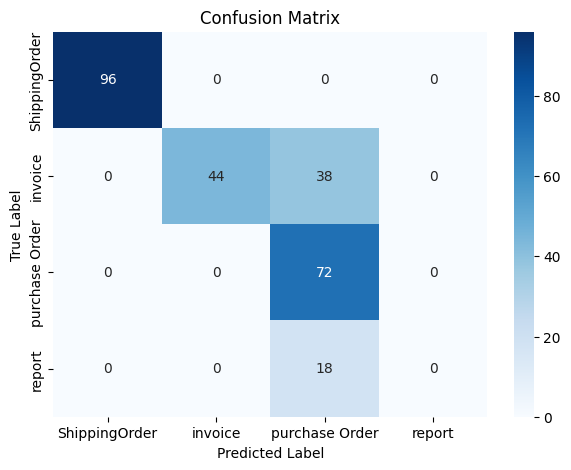

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluation Accuracy: 0.7910, F1 Score: 0.7653
Sample Labels: [2 2 0 0 3 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0]
Sample Predictions: [2 2 0 0 2 2 2 0 2 0 0 0 2 0 0 0 0 1 0 0]


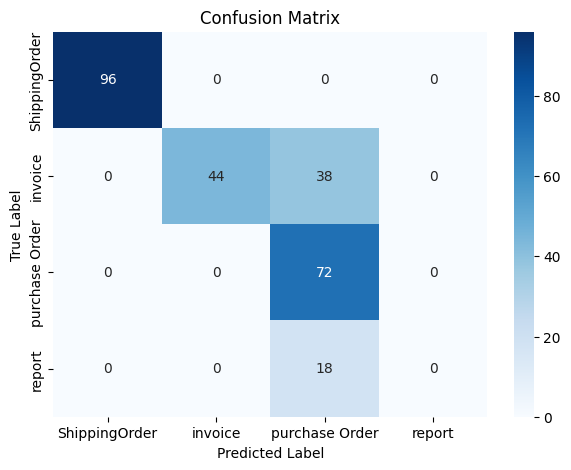

Final Test Accuracy: 0.7910
Evaluation Accuracy: 0.7910, F1 Score: 0.7653
Sample Labels: [2 2 0 0 3 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0]
Sample Predictions: [2 2 0 0 2 2 2 0 2 0 0 0 2 0 0 0 0 1 0 0]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


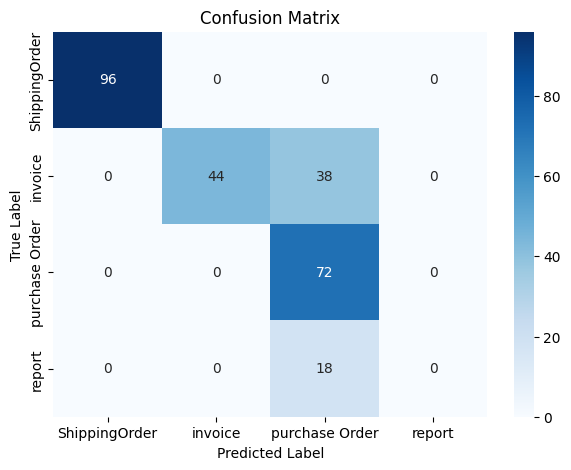

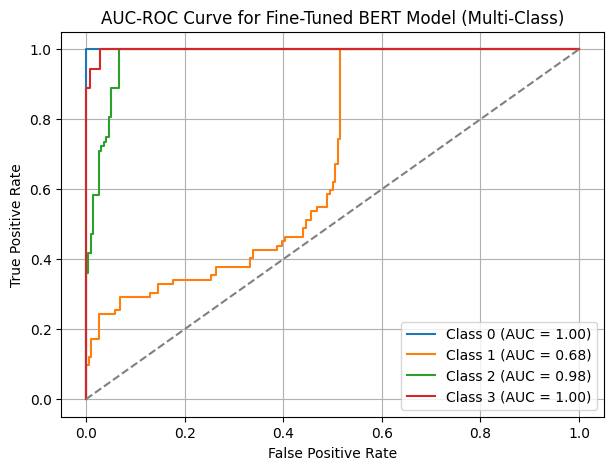

In [26]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

# Preprocess text to avoid duplicates due to case sensitivity or extra spaces
df['text'] = df['text'].str.lower().str.strip()

# Ensure proper train-test split with stratification
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

# Check dataset size
print(f"Training Samples: {len(train_labels)}, Test Samples: {len(test_labels)}")

# Check for train-test overlap
train_set = set(train_texts)
test_set = set(test_texts)
overlap = train_set.intersection(test_set)
print(f"Number of overlapping samples: {len(overlap)}")
if len(overlap) > 0:
    print("Overlapping Samples:", list(overlap)[:5])  # Print first 5 overlaps

# Print sample train and test texts to check similarity
print("Sample Train Texts:", train_texts[:5])
print("Sample Test Texts:", test_texts[:5])

# Increase training data size to 50% to reduce overfitting
train_texts, train_labels = train_texts[:int(0.5 * len(train_texts))], train_labels[:int(0.5 * len(train_labels))]

# Load pre-trained BERT model with increased dropout to prevent overfitting
model = AutoModelForSequenceClassification.from_pretrained(
    model_name, num_labels=len(label_encoder.classes_), hidden_dropout_prob=0.5, attention_probs_dropout_prob=0.5
)

# Training arguments (fewer epochs, weight decay added)
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",  # Evaluate at the end of each epoch
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,  # Reduced to 1 to avoid memorization
    weight_decay=0.1,  # Increased for better regularization
    load_best_model_at_end=True,
)

# Define metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)  # Ensure correct logits processing
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="weighted")
    acc = accuracy_score(labels, predictions)
    print(f"Evaluation Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")  # Log accuracy and F1 score
    print("Sample Labels:", labels[:20])  # Print first 20 true labels
    print("Sample Predictions:", predictions[:20])  # Print first 20 predicted labels

    # Confusion Matrix
    cm = confusion_matrix(labels, predictions)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

# Create Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

# Evaluate on the test dataset explicitly
eval_results = trainer.evaluate(test_dataset)
print(f"Final Test Accuracy: {eval_results['eval_accuracy']:.4f}")

# Compute and plot AUC-ROC
predictions = trainer.predict(test_dataset)
logits = predictions.predictions
y_true = predictions.label_ids

n_classes = logits.shape[1]  # Number of classes
y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))

plt.figure(figsize=(7, 5))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], logits[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve for Fine-Tuned BERT Model (Multi-Class)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

# Load pre-trained BERT model
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(label_encoder.classes_))

# Training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",  # Evaluate at the end of each epoch
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
)

# Define metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)  # Ensure correct logits processing
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="weighted")
    acc = accuracy_score(labels, predictions)
    print(f"Evaluation Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")  # Log accuracy and F1 score
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

# Create Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

# Evaluate on the test dataset explicitly
eval_results = trainer.evaluate(test_dataset)
print(f"Final Test Accuracy: {eval_results['eval_accuracy']:.4f}")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-31-59c5f8034565>:29: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,0.003886,1.000000,1.000000,1.000000,1.000000
2,No log,0.001841,1.000000,1.000000,1.000000,1.000000
3,No log,0.001509,1.000000,1.000000,1.000000,1.000000


Test Accuracy: 1.0


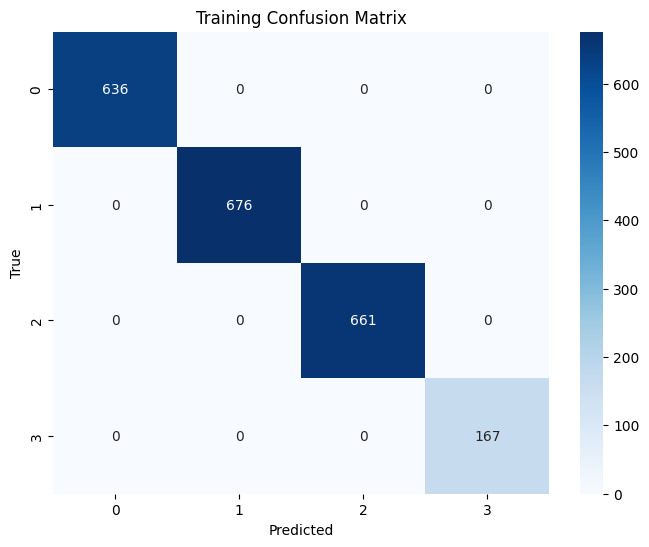

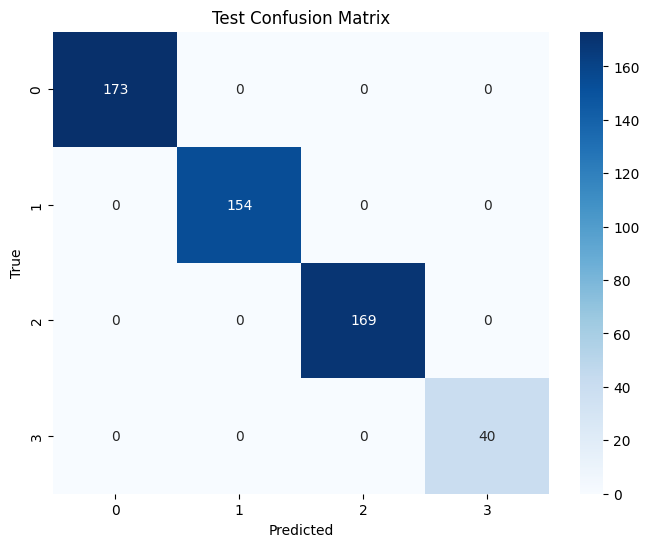

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix for the training data
train_preds = trainer.predict(train_dataset)
train_cm = confusion_matrix(train_preds.label_ids, train_preds.predictions.argmax(axis=-1))

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Training Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Compute confusion matrix for the test data
test_preds = trainer.predict(test_dataset)
test_cm = confusion_matrix(test_preds.label_ids, test_preds.predictions.argmax(axis=-1))

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Save Model

# Prediction System

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np

# Load fine-tuned model and tokenizer
model_name = "/content/drive/My Drive/model/bert"  # Update with your saved model path if necessary
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)


# Function for prediction
def predict(text):
    # Clean the input text (if you have a cleaning function)
    text = clean_text(text)

    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=128)

    # Make prediction
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        predicted_class = torch.argmax(logits, dim=1).item()

    # Convert scalar to array-like and return inverse transform
    return label_encoder.inverse_transform([predicted_class])[0]  # Return the predicted class label

# Example usage
input_text = "invoice order id  10707 customer id  arout order date  2017-10-16 customer details  contact name  thomas hardy address  120 hanover sq. city  london postal code  wa1 1dp country  uk phone   171  555-7788 fax   171  555-6750 product details  product id product name quantity unit price 55 pâté chinois 21 24 0 57 ravioli angelo 40 19 5 70 outback lager 28 15 0 totalprice 1704 0 page 1"
print(predict(input_text))


1


In [ ]:
# Example usage
input_text = "order id  10345 shipping details  ship name  quick-stop ship address  taucherstraße 10 ship city  cunewalde ship region  western europe ship postal code  1307 ship country  germany customer details  customer id  quick customer name  quick-stop employee details  employee name  andrew fuller shipper details  shipper id  2 shipper name  united package order details  order date  2016-11-04 shipped date  2016-11-11 products  -------------------------------------------------------------------------------------------------- product  northwoods cranberry sauce quantity  70 unit price  32 0 total  2240 0 -------------------------------------------------------------------------------------------------- product  teatime chocolate biscuits quantity  80 unit price  7 3 total  584 0 -------------------------------------------------------------------------------------------------- product  singaporean hokkien fried mee quantity  9 unit price  11 2 total  100 8 total price  total price  2924 8"
print(predict(input_text))

0


In [ ]:
# Example usage
input_text = "purchase orders order id order date customer name 10613 2017-07-29 carlos hernández products product id  product  quantity  unit price  13 konbu 8 6 75 rhönbräu klosterbier 40 7 75 page 1"
print(predict(input_text))